In [1]:
import pandas as pd
import numpy as np
import os #Interacts with the operating system, e.g. paths, mkdir
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Allows ploting in a 3D graph

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
file_path = r'C:/Users/crist/Documents/02.MSU_MsDataScience/2024.SPRING/04.CSIT598_03SP24_MACHINE-LEARNING/02.MACHINE_LEARNING_SP23/PowerPlantsintheU_Export_TableToExcel.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Select columns to analyze
Scolumns = ['Install_MW','Bat_MW','Bio_MW','Coal_MW','Geo_MW','Hydro_MW', 'HydroPS_MW', 'NG_MW', 'Nuclear_MW', 'Crude_MW', 'Solar_MW', 'Wind_MW', 'Other_MW']
# 'sector_nam'
label_encoder = LabelEncoder()

data_encoded = df[Scolumns].copy()

# data_encoded['State_encoded'] = label_encoder.fit_transform(df[Scolumns].State)
# data_encoded['PimSource_encoded'] = label_encoder.fit_transform(df[Scolumns].PrimSource)

# One-hot encoding
# data_encoded = pd.get_dummies(df[Scolumns], columns = ['State'], dtype='int')

# data_encoded = data_encoded[['Install_MW','Total_MW','PimSource_encoded','State_encoded']]
data_encoded       

,Install_MW,Bat_MW,Bio_MW,Coal_MW,Geo_MW,Hydro_MW,HydroPS_MW,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW
0,2.3,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,91.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0
3,3.8,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.6,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
12004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
12005,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
12006,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0


In [4]:
X = data_encoded.drop('Install_MW',axis=1)
y = data_encoded['Install_MW']
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (12008, 12)
Shape of target variable (y): (12008,)


In [5]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X = pca.fit_transform(X)
X

,Bat_MW,Bio_MW,Coal_MW,Geo_MW,Hydro_MW,HydroPS_MW,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW
0,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
12004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
12005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
12006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0


## Scale the data

In [6]:
scaler = MinMaxScaler()

# Fit the scaler to your training data and transform the features
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00853388, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00238949, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00187745, 0.        ,
        0.        ]])

# Decision Trees

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeRegressor(
    max_depth=5, # increasing could result in overfitting
    min_samples_split=100, #increasing can prevent overfitting
    min_samples_leaf=20, # increasing can prevent overfitting
    max_features='sqrt'
,random_state=45)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse)


Mean Squared Error: 54497.68397635983


#### Feature importance

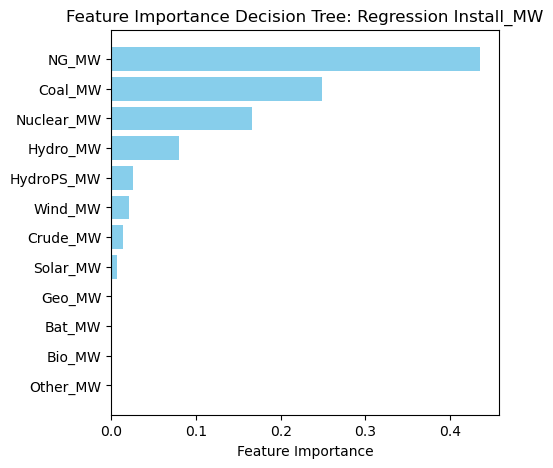

In [17]:
# Access feature importance
feature_importance = decision_tree.feature_importances_

feature_names = X.columns

# Sort feature importance and feature names together
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(5, 5))
plt.barh(range(len(sorted_names)), sorted_importance, align='center', color='skyblue')
plt.yticks(range(len(sorted_names)), sorted_names)
plt.xlabel('Feature Importance')
title = 'Feature Importance Decision Tree: Regression ' + y.name
plt.title(title)
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

#### Visualize the tree

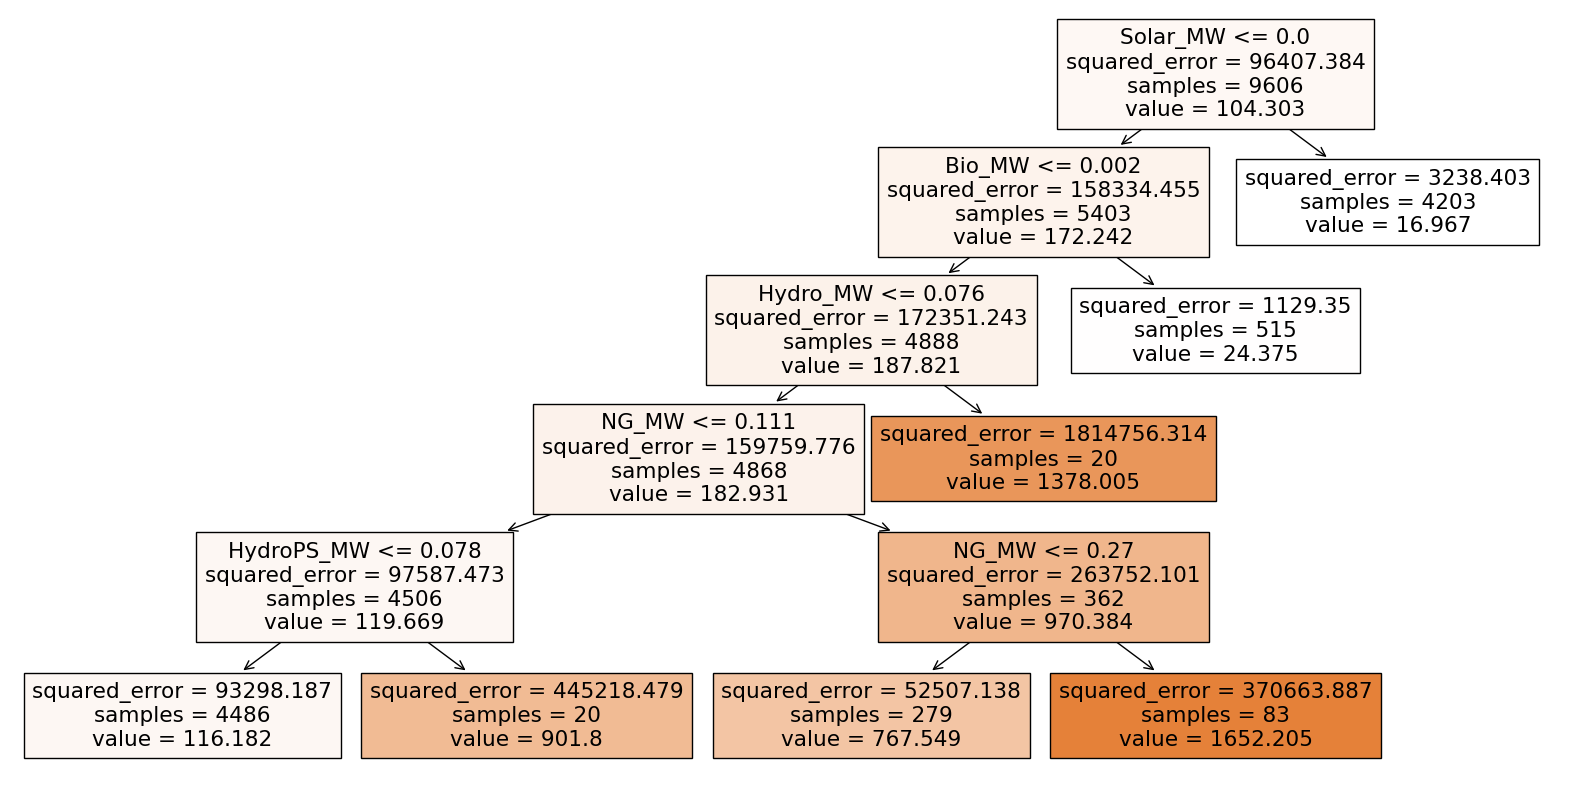

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.show()


## Cross-Validation Decision Tree

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds for cross-validation
n_splits = 10  # You can adjust the number of splits as needed

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store MSE scores for each fold
mse_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X_scaled):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    # Train the model on the training fold
    decision_tree = DecisionTreeRegressor(random_state=42)
    decision_tree.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_pred_fold = decision_tree.predict(X_val_fold)
    
    # Calculate MSE for this fold and append it to the list
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    mse_scores.append(mse_fold)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_scores)

# Optionally, you can print or display the MSE scores for each fold
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", average_mse)


MSE scores for each fold: [3424.898314511178, 1643.127313065466, 3290.796688682682, 3090.415528473228, 1219.8991138198955, 1588.9330652412934, 18585.063551568262, 2466.5950354477072, 3794.169057702138, 910.4266879830911]
Average MSE: 4001.4324356494935


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse)

# Access feature importance
feature_importance = random_forest.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Print feature importance
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importance[i]}")

# # Interpret feature importance
# for i, importance in enumerate(feature_importance):
#     print(f"Feature {i}: Importance = {importance}")


Mean Squared Error: 2537.505500860077
NG_MW: 0.4227740323237166
Coal_MW: 0.23369449588488347
Nuclear_MW: 0.1923396298044438
Hydro_MW: 0.08160552406097814
HydroPS_MW: 0.024700899282415843
Wind_MW: 0.019950638277067875
Crude_MW: 0.01462332584397051
Solar_MW: 0.006746400849504751
Geo_MW: 0.0014886185189643835
Bat_MW: 0.0012271583718575423
Bio_MW: 0.0006262103014232694
Other_MW: 0.0002230664807738608


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Mean Squared Error (MSE): 2537.505500860077
Mean Absolute Error (MAE): 9.677898011885917
R-squared: 0.9750143905610806


### Feature Importance Plot

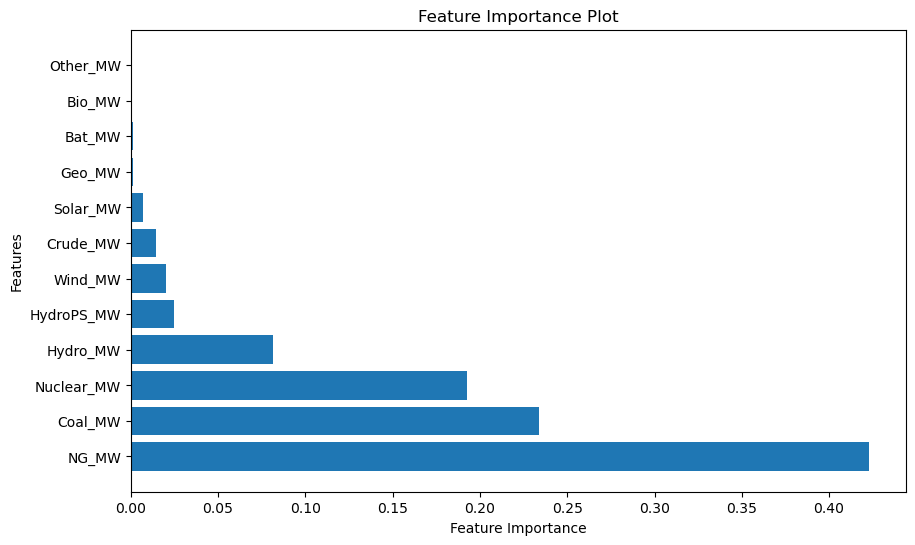

In [14]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = random_forest.feature_importances_

# Get feature names from the dataset
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


In [15]:
from pdpbox import pdp, get_dataset, info_plots

# Create partial dependence plots
pdp_goals = pdp.pdp_isolate(model=random_forest, dataset=X_train, model_features=X_train.columns, feature=['Feature1', 'Feature2'])
pdp.pdp_plot(pdp_goals, 'Feature1 & Feature2')
plt.show()


ModuleNotFoundError: No module named 'pdpbox'

### Permutation Importance

In [ ]:
X

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(random_forest, X_test, y_test)
sorted_indices = np.argsort(perm_importance.importances_mean)[::-1]

# Plot permutation importance
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_indices)), perm_importance.importances_mean[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Importance Plot')
plt.show()


### Partial Dependence Plots

In [ ]:
python.exe -m pip install --upgrade pip


In [ ]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=9)  # You can adjust the number of neighbors (K) as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (KNN Regressor)')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [2, 5, 10, 20],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Evaluate the best model
y_pred_best = best_knn.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (Best Model):", mse_best)


# SVMs

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your features in X and target variable in y

# Initialize the SVM regressor
svm_regressor = SVR(kernel='poly')  # You can specify different kernels like 'linear', 'poly', 'sigmoid', etc.

# Train the model
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Pytorch

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Convert features and target variable to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Check the shapes
print("Shape of features (X_tensor):", X_tensor.shape)
print("Shape of target variable (y_tensor):", y_tensor.shape)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming X_tensor and y_tensor are your torch tensors

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the model architecture
class Model(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Model(input_size, num_classes)

# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 128

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming X_tensor and y_tensor are your torch tensors

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the model architecture
class Model(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Model(input_size, num_classes)

# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 128

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')
